In [ ]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

In [ ]:
def reload(intercept=False):

  global X, Y, m, n

  X = pd.read_csv('X_train.csv').iloc[:, 1:]
  Y = pd.read_csv('Y_train.csv').iloc[:, 1:]

  m, n = X.shape

  if intercept:

    X.insert(loc=0, column='b', value=[1.0] * m)
    
    n +=1

  X, Y = X.to_numpy(), Y.to_numpy()

# Normal Equation  + Regularization 

In [ ]:
reload(intercept=True)

l = 100.0 # regularization parameter

I = np.eye(n, n)
I[0][0] = 0

theta = np.linalg.inv(X.T @ X + l * I)  @ (X.T @ Y)

In [ ]:
err = ((X @ theta - Y) ** 2).mean()
print(err)

6467.828199273587


# Gradient Descent + Line Search

In [ ]:
def hypothesis(X, theta, b):

  return (X @ theta) + b

In [ ]:
def compute_gradient_step(X, Y, h, lr):

  dj = (h - Y)
  
  dtheta = X.T @ dj
  db = np.sum(dj)

  return dtheta * lr, db * lr

In [ ]:
def compute_cost(Y, h):

  return ((h - Y) ** 2).mean()

In [ ]:
def generate_lr_list(start=0.1, factor=0.1):

  lr_list = []
  
  while start > 1e-12:

    for i in range(1, 20):

      lr_list.append(start)
      start *= factor * i

  return lr_list

In [ ]:
def try_step(X, Y, theta, b, lr, return_update=False):

    # initial hypothesis
    h_i = hypothesis(X, theta, b)

    # gradient step
    dtheta, db = compute_gradient_step(X, Y, h_i, lr)
    
    # try
    tmp_theta = theta - dtheta
    tmp_b = b - db

    # hypothesis after update
    h = hypothesis(X, tmp_theta, tmp_b)

    # cost after update
    J = compute_cost(Y, h)

    if return_update:

      return J, tmp_theta, tmp_b
      
    return J

In [ ]:
def fit_model(X, Y, iter=10, start_lr=0.1, tol=0.0001):

  theta = np.zeros((n, 1))
  b = 0.0

  # generate learning rate list with, factor=0.1
  lr_list = generate_lr_list(start_lr, 0.1)

  print(f'No. of lr choices : {len(lr_list)}')
  print('=' * 100)
  
  cost = []

  for i in range(iter):
    
    lr = start_lr

    # initial - minimum cost
    mn_J = try_step(X, Y, theta, b, lr, False)

    for ith_lr in lr_list:
      
      # try update step
      J_i = try_step(X, Y, theta, b, ith_lr, False)

      """
        # 1. if minimum cost greater than cost after update step 
            set minimum = updated cost
        
        # 2. set best lr = ith_lr
      """

      if mn_J > J_i:

        mn_J = J_i
        lr = ith_lr
    
    J, theta, b = try_step(X, Y, theta, b, lr, True)

    print(f'iter - {i} | chosen lr = {lr} - Cost = {J}')
    
    # early stop 
    if i > 0 and cost[-1] - J <= tol:
      
      cost.append(J)
      
      print('=' * 50)
      print(f'Algorithm converged at step {i}')

      break

    cost.append(J)

  return theta, b, cost

In [ ]:
reload(intercept=False)

theta, b, cost = fit_model(X, Y, iter=300, start_lr=0.1, tol=0.0001)

No. of lr choices : 114
iter - 0 | chosen lr = 7.788377617446272e-12 - Cost = 6099805.808979987
iter - 1 | chosen lr = 7.788377617446272e-12 - Cost = 129146.00452947366
iter - 2 | chosen lr = 7.788377617446272e-12 - Cost = 10525.473162999191
iter - 3 | chosen lr = 7.788377617446272e-12 - Cost = 8168.8037712026
iter - 4 | chosen lr = 7.788377617446272e-12 - Cost = 8121.9762944506665
iter - 5 | chosen lr = 7.788377617446272e-12 - Cost = 8121.0389987545595
iter - 6 | chosen lr = 1.3138014451290946e-11 - Cost = 8121.011963035194
iter - 7 | chosen lr = 1.401907971140329e-11 - Cost = 8120.996507637663
iter - 8 | chosen lr = 4.379338150430315e-11 - Cost = 8120.972078893591
iter - 9 | chosen lr = 1.3138014451290946e-11 - Cost = 8120.946802886564
iter - 10 | chosen lr = 1.401907971140329e-11 - Cost = 8120.931659872015
iter - 11 | chosen lr = 4.379338150430315e-11 - Cost = 8120.905419387059
iter - 12 | chosen lr = 1.3138014451290946e-11 - Cost = 8120.8816974867805
iter - 13 | chosen lr = 2.66362

In [ ]:
pred = hypothesis(X, theta, b)

err = compute_cost(Y, pred)

print(err)

8115.602371536842


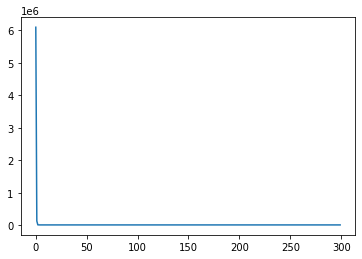

In [ ]:
iter = np.arange(0, len(cost))

plt.plot(iter, cost)
plt.show()